# Hello and welcome to this portfolio project in line with Codecademy's career path `Data Science: Machine Learning Specialist`.

## Aiming to explore, understand and overview data relating to the diverse animals in National parks and hopefully analyzing their conservation status and perhaps notice trends and insight.

### Two datasets will be explored:

    -Species_info: Contains category (species), scientific_name, common_names and 
    -conservation_status (fictional data)
    
     Observations: Contains Scientific_name, Park, Observations (fictional data)
    
    
   Note: The observations were recorded by each park in the span of 7 days (fictional data)

## The project aims to explore:
    
`What are the species in check?`
    
`What is the overall state of conservation?`
    
`How are observations divided across each park?`
    
`What is the actual distribution of observations?`
    
`What are the protected and unportected animal counts for each park?`
    
`What is the most prevalent species that were observed?`
    
-----------------------
-----------------------

## In addition, making infrences on the following questions:

`Is there an association between a type of species and their of conservation status?` (Suggested by Codecademy)
    
`Is there an association between a type of species and their chance of being observed?`

In [53]:
# Importing the relevant libraries and aliasing them

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [54]:
# Loading data

Species = pd.read_csv("species_info.csv")
Observations = pd.read_csv("observations.csv")

In [55]:
# Checking the first 5 rows of the Species dataframe

Species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [56]:
# Basic data exploration on the Species dataframe

print(f"Total animals : {len(Species)}")

Total animals : 5824


In [57]:
# Basic info on Species dataframe
Species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [58]:
# Describe the summary statics of variables

Species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [59]:
# Checking for missing data

Species.isna().any()

category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool

In [60]:
# Checking duplicates

duplicated_rows = Species.duplicated()

duplicated_rows[duplicated_rows == True]

# No duplicates here. The reason why checking is important is because this dataframe's rows should represent one animal as each 
# row (record) is essentially about one animal, any repeated rows would be unnecessary

Series([], dtype: bool)

# To address the species in check:


In [61]:
Species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

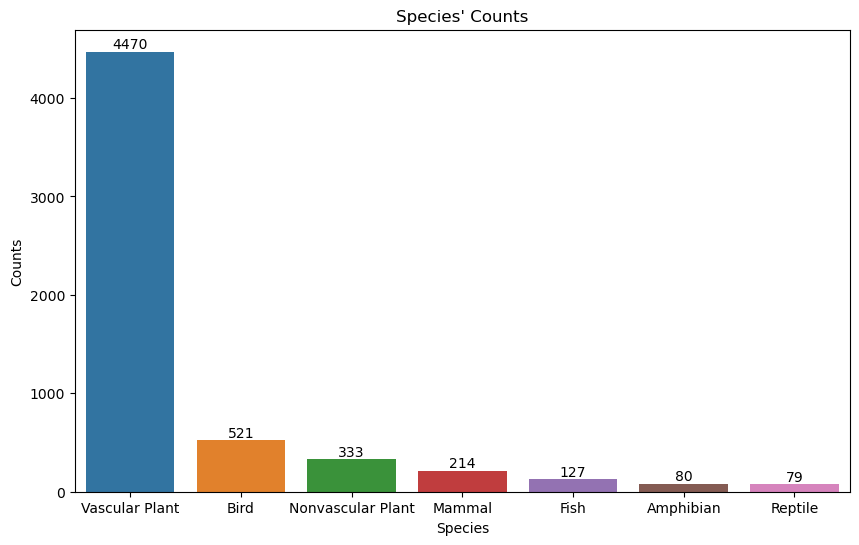

<Figure size 640x480 with 0 Axes>

In [62]:
# To plot the counts of each species
species = list(Species.category.value_counts().index) 
counts = list(Species.category.value_counts())
plt.figure(figsize=(10,6)) # Adjusting the figure for more readability 
ax = sns.barplot(x = species, y= counts) # Seaborn used to ease up the process of setting x_ticks
ax.bar_label(ax.containers[0]) # To show values on each bar
plt.xlabel("Species")
plt.ylabel("Counts")
plt.title("Species' Counts")
plt.show()
plt.clf()

In [63]:
# What are the different values of conservation status 

Species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

# For context:


The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `Safe`. 

'Explanations provided by Codecademy'

In [64]:
Species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [65]:
print(f"Null values: {len(Species[Species.conservation_status.isna()])}")
print(f"Recorded values count: {len(Species[~Species.conservation_status.isna()])}")                          

Null values: 5633
Recorded values count: 191


Since there is a huge amount of nan values, "safe" was assumed for the rest of animals as a state

In [66]:
Species.fillna("Safe",inplace = True)

In [67]:
Species.conservation_status.unique()

array(['Safe', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

# Addressing the overall state of conservation

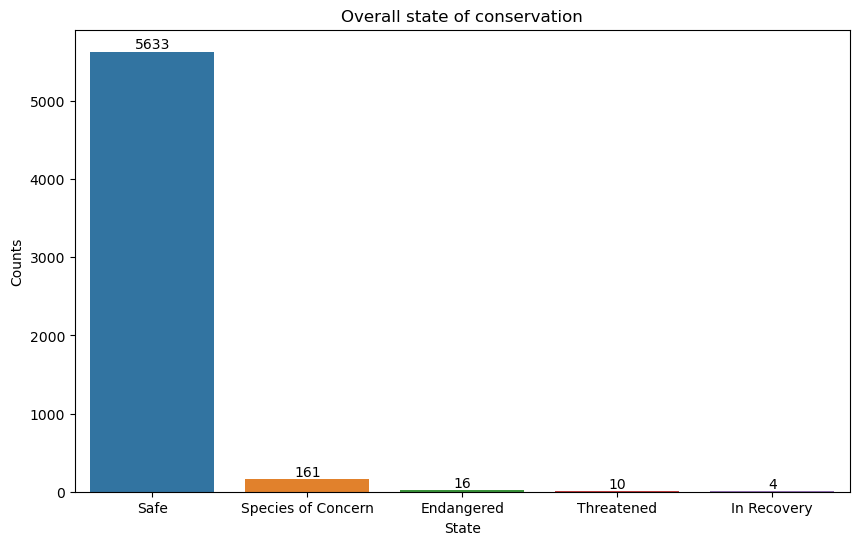

<Figure size 640x480 with 0 Axes>

In [68]:
# Plotting the bar plot
cons = list(Species.conservation_status.value_counts().index) 
counts_c = list(Species.conservation_status.value_counts())
plt.figure(figsize=(10,6)) # Adjusting the figure for more readability 
ax = sns.barplot(x = cons, y= counts_c) # Seaborn used to ease up the process of setting x_ticks
ax.bar_label(ax.containers[0]) # To show values on each bar
plt.xlabel("State")
plt.ylabel("Counts")
plt.title("Overall state of conservation")
plt.show()
plt.clf()

In [69]:
# Showcasing proportions

(Species.conservation_status.value_counts()/len(Species.conservation_status))*100

conservation_status
Safe                  96.720467
Species of Concern     2.764423
Endangered             0.274725
Threatened             0.171703
In Recovery            0.068681
Name: count, dtype: float64

# Checking the observations table

In [70]:
Observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [71]:
# How many records are in the dataframe

print(f"{len(Observations)} records")

23296 records


In [72]:
Observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [73]:
Observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [74]:
# Checking for missing values

Observations.isna().any()

scientific_name    False
park_name          False
observations       False
dtype: bool

# Inspecting the distribution of observations

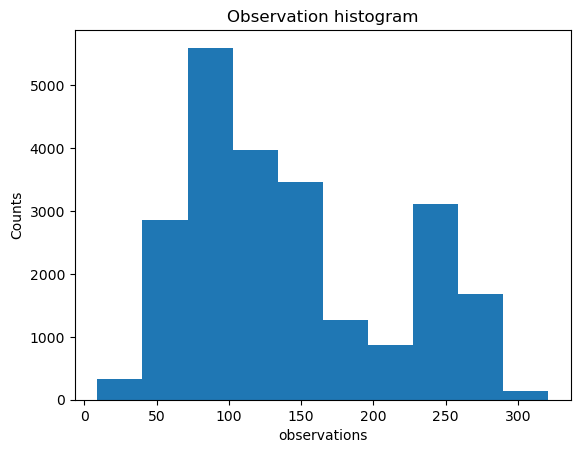

<Figure size 640x480 with 0 Axes>

In [75]:
# Adjusting the figure for more readability 
plt.hist(Observations.observations) 
plt.xlabel("observations")
plt.ylabel("Counts")
plt.title("Observation histogram")
plt.show()
plt.clf()

In [76]:
mean = Observations.observations.mean()
median = Observations.observations.median()
stdev =  Observations.observations.std()
maximum = Observations.observations.max()
minimum = Observations.observations.min()

Two peaks are presented, therefore suggesting the dataset in Bimodal (two distinct peaks are present).



In [77]:
print(f"""
The average observations tend to be around {mean}
The exact half waypoint value is {median}
The standard deviation is {stdev}
The maximum value of observations seen {maximum}
The minimum value of observations seen {minimum}
The range of observations {maximum - minimum}
""")


The average observations tend to be around 142.28790350274724
The exact half waypoint value is 124.0
The standard deviation is 69.89053226717053
The maximum value of observations seen 321
The minimum value of observations seen 9
The range of observations 312



In [78]:
most_frequent = Observations.observations.value_counts().index[0]

print(f"The most frequent observation value : {most_frequent}")

The most frequent observation value : 84


# How are the observations divided across each park?

In [79]:
# Let's group both park_name and observations for the plot

park_obs = Observations.groupby("park_name").observations.sum().reset_index()

park_obs.sort_values(["observations"],ascending=False)

,park_name,observations
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820


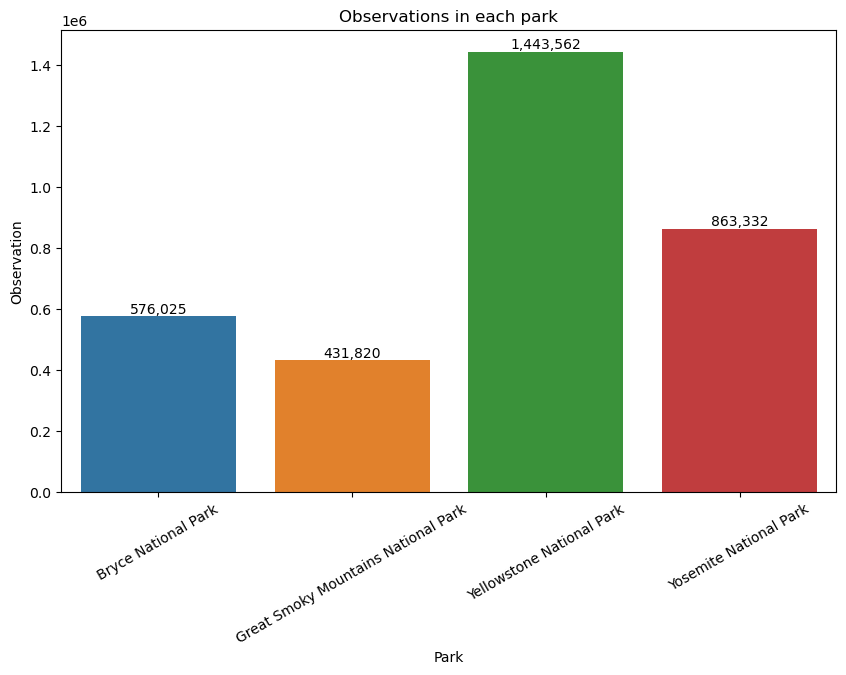

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(10,6)) # Adjusting the figure for more readability 
ax = sns.barplot(x = 'park_name',y="observations",data = park_obs) 
ax.tick_params(axis='x', rotation=30)
for container in ax.containers:
    # Extract observation values specific to this container's hue level
    observations = [f"{int(obs):,}" for obs in container.datavalues]
    # Call ax.bar_label with the container and corresponding observations
    ax.bar_label(container, labels=observations)
plt.xlabel("Park")
plt.ylabel("Observation")
plt.title("Observations in each park")
plt.show()
plt.clf()

Seems that the `Yellowstone National Park` has the most animal sightings with 144,356,2 total observations. The `Great Smoky Mountains National Park` has the lowest amount of sightings with 431,820 observations.

# Moving on, what is the difference between protected and unprotected animals in different parks?

In [81]:
sp_ob = Species.merge(Observations) # The scientific_name column is the key, 
                                    #didn't specify the left_on and right_on arguements here

sp_ob.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Safe,Yosemite National Park,128


--------------------------------------

A new variable (State) will be introduced:

   - any `Safe animal` is not protected, hence the state `"not protected"`
   - any `other status` will be labeled `"protected"`  
    
-------------------------------------

In [82]:
sp_ob['state'] = sp_ob.conservation_status.apply(lambda status: "not protected" if status == "Safe" else "protected")

sp_ob.state.unique()

array(['not protected', 'protected'], dtype=object)

In [83]:
sp_ob.head()

,category,scientific_name,common_names,conservation_status,park_name,observations,state
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Bryce National Park,130,not protected
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Yellowstone National Park,270,not protected
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Great Smoky Mountains National Park,98,not protected
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,Yosemite National Park,117,not protected
4,Mammal,Bos bison,"American Bison, Bison",Safe,Yosemite National Park,128,not protected


In [84]:
grouped =  sp_ob.groupby(['park_name','state']).observations.sum().reset_index()

grouped

,park_name,state,observations
0,Bryce National Park,not protected,614682
1,Bryce National Park,protected,18609
2,Great Smoky Mountains National Park,not protected,462047
3,Great Smoky Mountains National Park,protected,12816
4,Yellowstone National Park,not protected,1543058
5,Yellowstone National Park,protected,44583
6,Yosemite National Park,not protected,922539
7,Yosemite National Park,protected,26913


# Just to be clear, we know that "Safe" species make up around 96.720467% of the whole dataset. This is to avoid the narrative emposing that the parks are not protecting enough animals and observe the difference in protection states between parks.

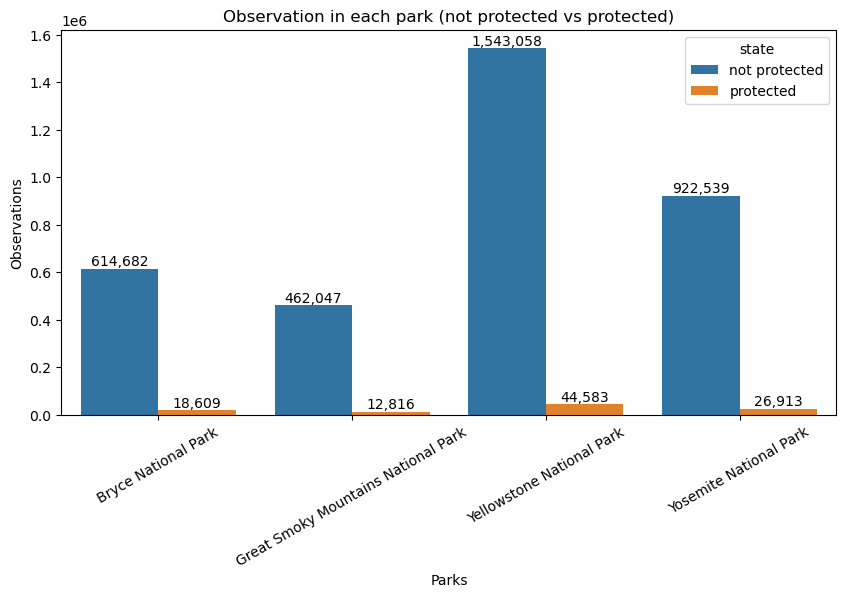

<Figure size 640x480 with 0 Axes>

In [85]:
# Plotting the difference
plt.figure(figsize = (10,5))
ax = sns.barplot(x="park_name",y="observations",data = grouped,hue = "state")
ax.tick_params(axis='x', rotation=30)
for container in ax.containers:
    # Extract observation values specific to this container's hue level
    observations = [f"{int(obs):,}" for obs in container.datavalues]
    # Call ax.bar_label with the container and corresponding observations
    ax.bar_label(container, labels=observations)
plt.xlabel("Parks")
plt.ylabel("Observations")
plt.title("Observation in each park (not protected vs protected)")
plt.show()
plt.clf()

## The difference in protection needs is clear, and as previously stated most animals are considered Safe. Parks also host animals that do need protection as well. To be exact the `Yellowstone National Park` hosts the most amount of "protection-needed" species with 44,583 in total. 

 ---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------


# What is the most prevalent species of them all ? (across all parks) 

In [86]:
category_obs = sp_ob.groupby('category').observations.sum().reset_index()

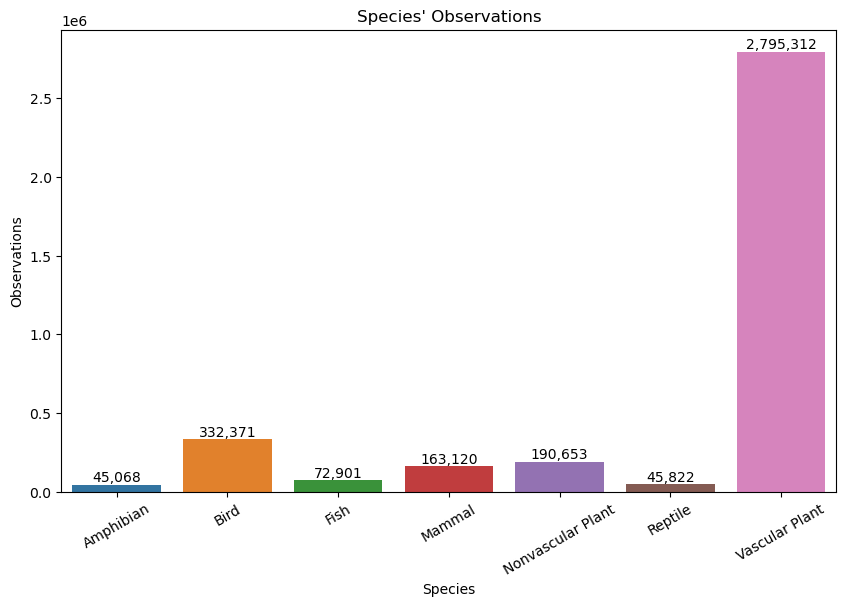

<Figure size 640x480 with 0 Axes>

In [87]:
plt.figure(figsize=(10,6)) # Adjusting the figure for more readability 
ax = sns.barplot(x = 'category',y="observations",data = category_obs) 
ax.tick_params(axis='x', rotation=30)
for container in ax.containers:
    # Extract observation values specific to this container's hue level
    observations = [f"{int(obs):,}" for obs in container.datavalues]
    # Call ax.bar_label with the container and corresponding observations
    ax.bar_label(container, labels=observations)
plt.xlabel("Species")
plt.ylabel("Observations")
plt.title("Species' Observations")
plt.show()
plt.clf()

## Among observed species in the parks, `vascular plants` are the most abundant (2.795 million), while `amphibians` are the least common (45,000). This highlights the diversity of plant life compared to animal life.

--------------------------------------------------------
--------------------------------------------------------

# Do some species require more protection than other species?

   **Is there an association between species and their conservation status?**

As we are looking at two variables -- The species (Category - type: categorical ) and The protection status (state - type: categorical)

Both variables are categorical hence the utilization of the contengincy table from SciPy library in order to determine if an association is present.

In [88]:
# A frequency table is required

freq_table = pd.crosstab(sp_ob.category,sp_ob.state)

freq_table

state,not protected,protected
category,,
Amphibian,300,28
Bird,2016,348
Fish,476,48
Mammal,968,232
Nonvascular Plant,1312,20
Reptile,304,20
Vascular Plant,19376,184


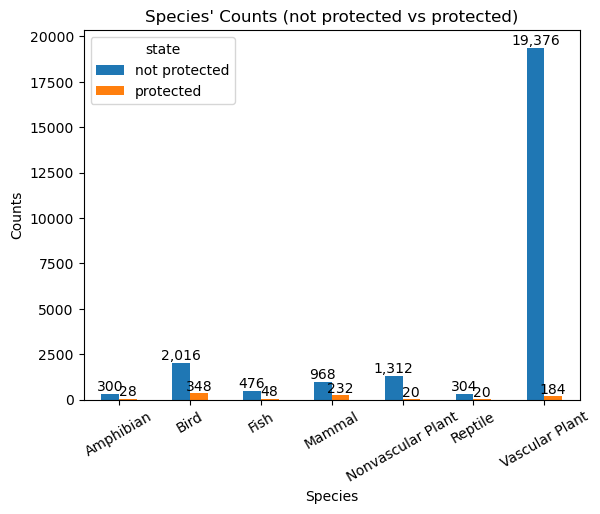

<Figure size 640x480 with 0 Axes>

In [89]:
ax = freq_table.plot.bar()
ax.tick_params(axis='x', rotation=30)

for container in ax.containers:
    # Extract observation values specific to this container's hue level
    observations = [f"{int(obs):,}" for obs in container.datavalues]
    # Call ax.bar_label with the container and corresponding observations
    ax.bar_label(container, labels=observations)
plt.xlabel("Species")
plt.ylabel("Counts")
plt.title("Species' Counts (not protected vs protected)")
plt.show()
plt.clf()

In [90]:
chi2,pval,dof,expected = scipy.stats.chi2_contingency(freq_table)

chi2

2290.0359972769897

## The `chi2` statistic value inspected is 2290.03, which points at a high association between a species and their need of protection. (Yes the difference between unique species and each of their protection need is different)



## A more in depth analysis would include finding if the protection needed is different (e.g. between Mammal and Birds) 

In [91]:
# reinspect the freq teable 

freq_table

state,not protected,protected
category,,
Amphibian,300,28
Bird,2016,348
Fish,476,48
Mammal,968,232
Nonvascular Plant,1312,20
Reptile,304,20
Vascular Plant,19376,184


In [92]:
# Build the table for Mammals and Birds 
#---->    not protected, protected
#    Bird     2016         348  
#    Mammal   968          232
freq_table = [[2016,348],[968,232]]
chi2,pval,dof,expected = scipy.stats.chi2_contingency(freq_table)

print(f"chi2_statistic = {chi2}",f"p_value (probability value) = {pval}")

chi2_statistic = 12.092215158920977 p_value (probability value) = 0.0005063278334220973


## An association is apparent hence the previous analysis, but the pval ~= 0.05 (the significance threshold) ensures a significant difference in how mammals and birds are protected.

---------------------------------------------------------
--------------------------------------------
# Are the chances of oberserving different species significant?

As we are looking at two variables -- The species (Category - type: categorical ) and observation (observation - type: int)

Both variables are categorical and Numerical, respectively. Finding the median differences to visualize it, while conducting an ANOVA test and a Tukey test to find the association.

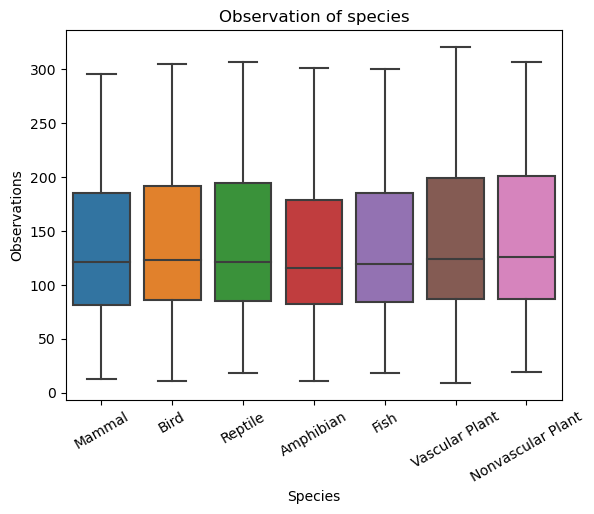

<Figure size 640x480 with 0 Axes>

In [96]:
ax = sns.boxplot(x = 'category',y="observations",data = sp_ob) 
ax.tick_params(axis='x', rotation=30)
plt.xlabel("Species")
plt.ylabel("Observations")
plt.title("Observation of species")
plt.show()
plt.clf()

## Upon inspection, the median values seem to be relatively aligned proposing that a chance of observing is not associated with species itself. However let's conduct an ANOVA and tukey test to make an inference.

In [94]:
# Seperating the observations into different variables
obs_mammals =sp_ob.observations[sp_ob.category == 'Mammal']
obs_birds=sp_ob.observations[sp_ob.category == 'Bird']
obs_reptile =sp_ob.observations[sp_ob.category == 'Reptile']
obs_amphibian =sp_ob.observations[sp_ob.category == 'Amphibian']
obs_fish =sp_ob.observations[sp_ob.category == 'Fish']
obs_vascular_plant =sp_ob.observations[sp_ob.category == 'Vascular Plant']
obs_nonvascular_plant =sp_ob.observations[sp_ob.category == 'Nonvascular Plant']
F_statistic, pval = scipy.stats.f_oneway(obs_mammals,obs_birds,obs_reptile,obs_amphibian,obs_fish,obs_vascular_plant,obs_nonvascular_plant)

pval

0.015239381544791774

### A `probability value` of 0.015 which is lower than the assumed significane threshold incdicates that the there is a significant chance of observing different species (AT LEAST ONE PAIR) 

--------------------------------

# A tukey test needs to be conducted

In [95]:
# the function here : pairwise_tukeyhsd(species, observation, type I error (== significance threshold))

tukey = pairwise_tukeyhsd(sp_ob.observations,sp_ob.category,0.05)

print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
        Amphibian              Bird   3.1944 0.9873  -8.9495 15.3383  False
        Amphibian              Fish   1.7216 0.9999 -12.7894 16.2327  False
        Amphibian            Mammal  -1.4691 0.9999 -14.3106 11.3724  False
        Amphibian Nonvascular Plant   5.7304  0.838  -6.9737 18.4346  False
        Amphibian           Reptile   4.0235 0.9904 -12.1199 20.1669  False
        Amphibian    Vascular Plant   5.5072 0.7939  -5.9679 16.9822  False
             Bird              Fish  -1.4728 0.9995 -11.4244  8.4787  False
             Bird            Mammal  -4.6635 0.4921 -11.9688  2.6417  False
             Bird Nonvascular Plant    2.536 0.9399  -4.5251  9.5971  False
             Bird           Reptile   0.8291    1.0 -11.3805 13.0386  False
            

## The tukey range test outputs a pair-wise comparison, hence the naming convention of the function.

* `reject`, the most important column, either rejects the null hypothesis (That the chances of observing different species are the same for that pair), therefore, True, otherwise it would conclude that the chances of a specific pair are not significant (same chances to observe both) with False. 
  
--------------------------------------------------------

## The tests confirms the null hypothesis for all the pair but (Mammal and Vascular Plant) where it rejected the null hypothesis ---> Deducing that the chances of observing both species are significant.

## To conclude the project:

### Thank you for your dedicated time 


* Main Takeways:

   - There were 7 species under the scope of this exploration `'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant','Nonvascular Plant'`
   ---------------
   - The overall state of conservation included stats -> (Safe - 5233),(species of concern - 161),(endangered - 16),(threatend - 10),(in recovery - 4)
   ---------------
   - The `Yellowstone National Park` has seen the most animal sightings with 144,356,2 total observations. The `Great Smoky Mountains National Park` has the lowest amount of sightings with 431,820 observations.
   ---------------
   - The `Yellowstone National Park` hosts the most amount of "protection-needed" species with 44,583 in total.
   ---------------
   - Among observed species, the `vascular plants` were the most abundant (2.795 million)
   ---------------
   -  A high association was found between a species and their need of protection (e.g. There is a significant difference in how mammals and birds are protected)
   ---------------
   - There is a significant chance of observing different species (one pair or more), hence the significant chances of observing Mammals and Vascular Plants